In [87]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
%matplotlib inline

#### Check out the data

In [88]:
# merging two csv files 
# student_data = pd.read_csv('combined_file.csv')
#student_data = pd.concat(map(pd.read_csv, ['student-mat.csv', 'student-por.csv']), ignore_index=True)

# Read the CSV files
df1 = pd.read_csv('student-mat.csv', sep=';')
df2 = pd.read_csv('student-por.csv', sep=';')

# Merge the two dataframes
student_data = pd.concat([df1, df2])

student_data.to_csv("combined.csv", index=False)

##### Understand the data

In [89]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [90]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [91]:
student_data.drop(columns=student_data.columns[0], axis=1,  inplace=True)

In [92]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [93]:
student_data.drop_duplicates()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,R,GT3,T,2,3,services,other,course,...,5,4,2,1,2,5,4,10,11,10
645,F,18,U,LE3,T,3,1,teacher,services,course,...,4,3,4,1,1,1,4,15,15,16
646,F,18,U,GT3,T,1,1,other,other,course,...,1,1,1,1,1,5,6,11,12,9
647,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,6,10,10,10


In [94]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [95]:
X = student_data[['age', 'sex', 'Pstatus', 'famsize', 'Medu', 'Fedu', 'studytime', 'famsup', 'famrel', 'paid','goout', 'activities' , 'Dalc', 'Walc']]
y = student_data[['absences', 'higher', 'health','failures']]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train


,age,sex,Pstatus,famsize,Medu,Fedu,studytime,famsup,famrel,paid,goout,activities,Dalc,Walc
239,18,M,T,GT3,2,2,2,no,5,no,4,no,3,5
457,17,M,T,LE3,1,2,1,yes,5,no,5,yes,5,5
515,18,F,T,LE3,1,1,2,no,2,no,5,no,1,4
357,18,F,T,GT3,4,3,3,yes,4,no,4,yes,1,1
395,18,M,T,GT3,4,4,2,yes,4,no,3,yes,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,18,F,T,GT3,2,1,2,yes,4,no,5,no,1,2
270,19,F,T,GT3,3,3,2,yes,4,yes,5,yes,3,3
99,16,F,T,GT3,4,3,3,yes,5,yes,5,no,1,1
55,16,F,A,GT3,2,1,2,no,5,no,4,yes,1,1


<Axes: ylabel='Count'>

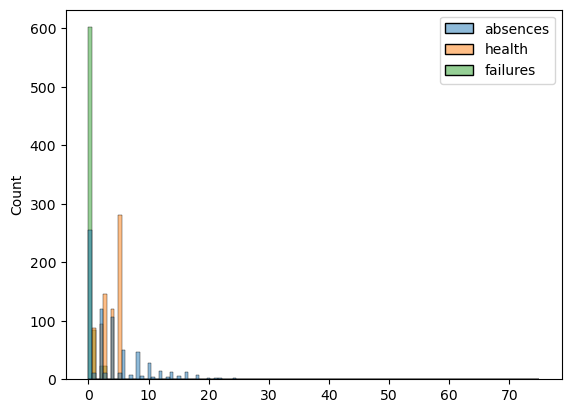

In [97]:
sns.histplot(y_train)


<Axes: ylabel='Count'>

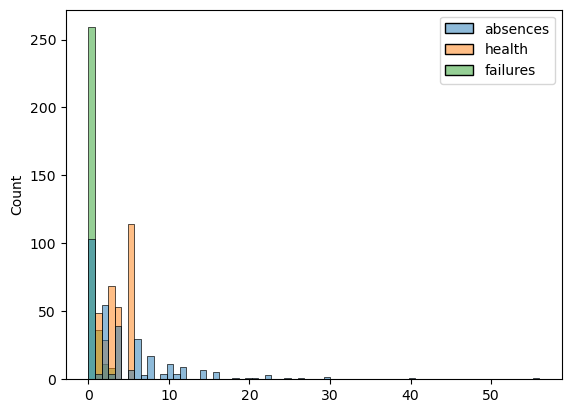

In [98]:
sns.histplot(y_test)

In [99]:
''' decision tree '''
clf = DecisionTreeClassifier(random_state=2021)

In [100]:
X_train = X_train.drop(['sex','Pstatus', 'famsize', 'famsup','paid','activities'],axis=1)
X_test = X_test.drop(['sex','Pstatus', 'famsize', 'famsup','paid','activities'],axis=1)
y_train = y_train.drop(['higher'],axis=1)
y_test = y_test.drop(['higher'],axis=1)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [101]:
y_test

,absences,health,failures
429,5,2,0
154,0,4,0
581,2,5,2
604,2,2,1
68,0,4,0
...,...,...,...
345,0,4,0
344,0,1,0
498,0,1,0
248,8,5,1


In [102]:
dt_predictions = clf.predict(X_test)

In [103]:
pred = clf.predict(X_test)

In [104]:
cm = metrics.confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

ValueError: multiclass-multioutput is not supported

In [84]:
accuracy = accuracy_score(y_test, pred)
print(f'accuracy: {accuracy:.2f}')


ValueError: multiclass-multioutput is not supported